# Linear Regression


features- Input variables (independent variables)


label or target - output variable( Dependent variable)


features & labels & predecting/estimating continious variable data


exp and tech is features(independent variable


salary is label(dependent variable)

# The problem statement



This data is about the amount spent on advertising through different channels like TV, Radio, and Newapaper . The goal is to predict how the expence on each channel affects the sales and is there a way  to optimise that sale?

In [1]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Advertising.csv') # Reading the data file

In [3]:
data.head() # checking the firstfive rows from the dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.info()  # Print the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.isna().sum() # finding the count of missing values from different columns

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

# Now, let's showcase the relationship between the feature and target column

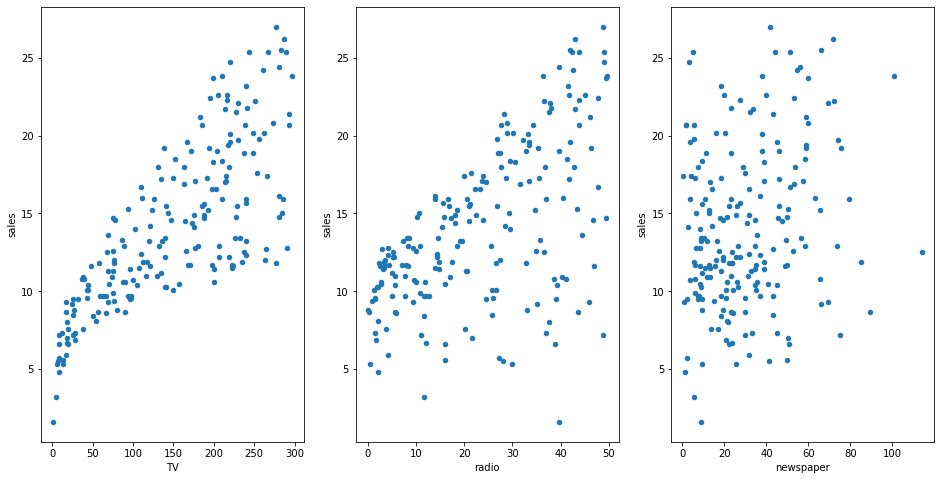

In [7]:
# visualize the relationship between the features and the response using scatterplots
fig,axs=plt.subplots(1,3)
data.plot(kind='scatter',x='TV', y='sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='radio', y='sales',ax=axs[1])
data.plot(kind='scatter',x='newspaper', y='sales',ax=axs[2])
fig.savefig('testdata.jpg')

In [8]:
# create X=feature and y = label

In [9]:
x=data[['TV']]
y= data.sales

# follow the usual sklearn pattern: import,instantiate,fit

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [10]:
# print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [11]:
# Prediction using the model
#calculate the prediction

7.03259354 + 0.047537*50

9.40944354

In [12]:
# Thus, we would predict sales of 9.40944354 widgets in That market.
# Lets do the same thing using code

In [13]:
# let's create a DataFrame since model

X_new=pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [14]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([9.40942557])

In [15]:
#  lm.fit(features,label)
# lm.predict(feature)

In [16]:
# print the p-values for the model coefficients
import statsmodels.formula.api as smf
lm= smf.ols(formula='sales ~ TV', data=data).fit()
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [17]:
# print thr R- squared value for the model
lm.rsquared

0.611875050850071

In [18]:
# Multiple Linear Regression

In [19]:
# Create X and Y 
x=data[['TV','radio','newspaper']]
y=data.sales

lm=LinearRegression()
lm.fit(x,y)

#print intercept and coefficients

print('Intercept  :  ->',lm.intercept_)
print('TV  :  ->',lm.coef_[0])
print('Radio :  ->',lm.coef_[1])
print('Newspaper  :  ->',lm.coef_[2])

Intercept  :  -> 2.9388893694594067
TV  :  -> 0.04576464545539761
Radio :  -> 0.18853001691820462
Newspaper  :  -> -0.0010374930424762972


In [20]:
lm=smf.ols(formula='sales~ TV+radio++newspaper',data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 17 May 2022   Prob (F-statistic):           1.58e-96
Time:                        13:00:52   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# learnt from summary

#TV and radio ahs positive p value and newspaper has negative p value 

In [22]:
# only include TV and radio in the model

lm=smf.ols(formula='sales ~ TV + radio',data=data).fit()
lm.rsquared

0.8971942610828957

In [23]:
#add newspaper to the model (which we believe has no association with sales)
lm=smf.ols(formula='sales~ TV+radio++newspaper',data=data).fit()
lm.rsquared

0.8972106381789522

# project _1 with Linear Regression 
   
   
   problem statement
   
   we need to predict the chance of admission based on the students various scores
   
   Features or Independent variables
   
   .GRE Score
   
   . TOEFL  Score
   
   . University Rating
   
   .SOP
   
   .LOR
   
   .CGPA
   
   .Research
   
   
   
  Label/Target
  
  .Chance of Admit
  



In [24]:
# Let's start with importing necessary Libraries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import pickle


import warnings
warnings.filterwarnings('ignore')


In [25]:
#Read csv file and convert into dataframe
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [26]:
data.shape

(500, 9)

In [27]:
# understand data at high level. check the statistics of data set

data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [28]:
data.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [29]:
# fill the null values
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())



In [30]:
# verify if Nan's are filled

data.isna().sum()


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Now the data looks good and there are no missing values. Also , the first cloumn is just serial numbers,so we don't need that column.Let's drop it from data and make it more clean.

In [31]:
# Dropping unwanted columns

data=data.drop(columns=['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [32]:
# Let's visualize the data and analyze the relationship between independent and dependent variables

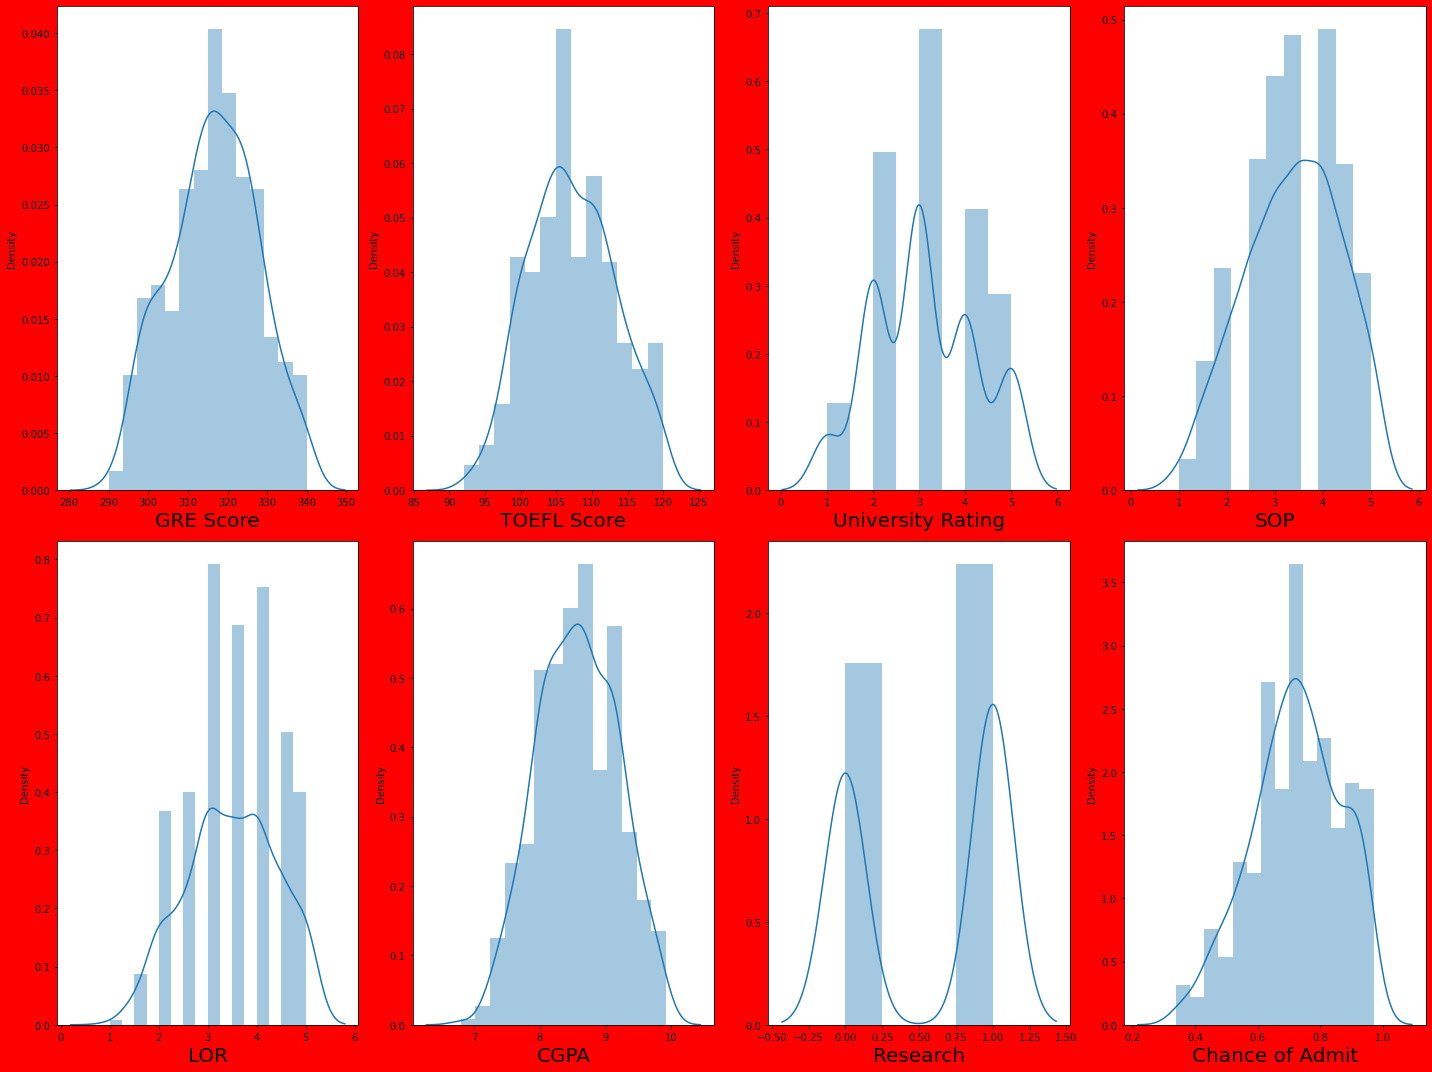

In [33]:
# let's see how data is distributed for every columns


plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()
    
    


In [34]:
#Lets observe the relation between independent variables and dependent variable.

In [35]:
# Divide data set into features and label

y= data['Chance of Admit']
x= data.drop(columns=['Chance of Admit'])

In [36]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [37]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


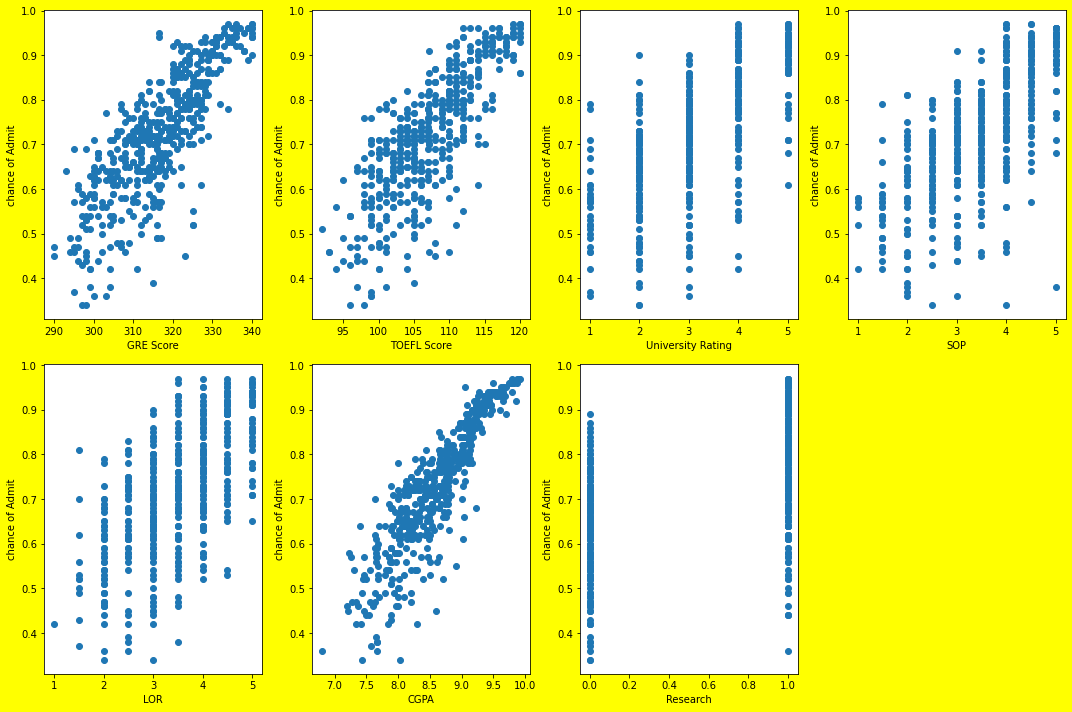

In [38]:
# visualizing relationship

plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber=1

for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        
       
        plt.xlabel(column,fontsize=10)
        plt.ylabel('chance of Admit',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()
    
    

In [39]:
# Data scaling.Formula Z=(X-mean)/std

scaler= StandardScaler()
X_scaled=scaler.fit_transform(x)
 

In [40]:
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

# Train Test Split

In [41]:
#split data into train and test.Model will be built on training data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=49)   # X_train is feature  & y_train is label
y_train.head()

401    0.66
221    0.75
110    0.61
76     0.74
195    0.78
Name: Chance of Admit, dtype: float64

# model instantiating and training

In [42]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

# predict the chance of admission given features

In [43]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [44]:
# since we have already fit the scaler,you can transform the data

print('Chance of Admission is: ', regression.predict(scaler.transform([[312.0,103.0,4.0,4.0,5.0,8.43,0]])))

Chance of Admission is:  [0.70551753]


In [45]:
print('Chance of Admission is: ', regression.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))

Chance of Admission is:  [0.82582913]


In [46]:
# you can save the model and later you can use it for prediction

In [47]:
# saving the model to the local file system
filename='finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))
# prediction using the saved model
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[314,103,2,2,3,8.21,0]]))

a

array([0.62816808])

In [48]:
#Adjusted R2 score
regression.score(x_train,y_train)

0.8145910304382725

# Let's check how well model fits the test data

In [49]:
regression.score(x_test,y_test)

0.8377796652353541

# Let's plot and visualize

In [50]:
y_pred=regression.predict(x_test)

In [51]:
y_pred

array([0.77592728, 0.82189355, 0.53237459, 0.53158915, 0.71913576,
       0.78296644, 0.67493981, 0.71765858, 0.95026714, 0.51343088,
       0.82749034, 0.65490214, 0.65336809, 0.69515263, 0.67870849,
       0.68422187, 0.77066709, 0.69587358, 0.61306985, 0.91270759,
       0.83613353, 0.5101666 , 0.62095565, 0.90970737, 0.67081486,
       0.91154893, 0.52166984, 0.61229555, 0.85070914, 0.83034104,
       0.50493884, 0.73415525, 0.76966228, 0.61102598, 0.79870804,
       0.58112644, 0.75399139, 0.84620015, 0.86249992, 0.75216791,
       0.65235971, 0.96012442, 0.66118549, 0.6427768 , 0.6556939 ,
       0.50748275, 0.68440277, 0.61035881, 0.51200968, 0.73397561,
       0.76162862, 0.89663454, 0.58197652, 0.9320727 , 0.59682293,
       0.71741367, 0.94389341, 0.76641482, 0.59803781, 0.78678587,
       0.76864083, 0.69049847, 0.74159936, 0.85564167, 0.77807617,
       0.74212136, 0.69536291, 0.73242447, 0.99167787, 0.96534931,
       0.66420324, 0.65200556, 0.75069108, 0.73163753, 0.67942

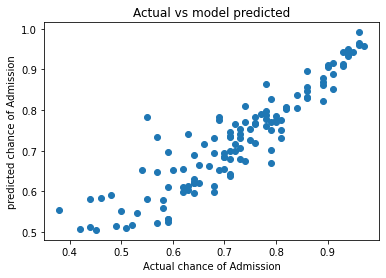

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of Admission')
plt.ylabel('predicted chance of Admission')
plt.title('Actual vs model predicted')
plt.show()

# Model Evaluation
   .Mean absolute error(MAE): Represents average error
   
   .Mean squared error(MSE): similar to MAE but noise is exaggerated and larger errors are "punished". It is harder to                                      interpret than MAE as it's not in base units.however ,it is generally more popular
   
   
   .Root mean squared error(RMSE): Most popular metric,similar to to MSE.however the result is square rooted to make it more                                      interpretable as it's in base units.It is recommended that RSME be used as the primary                                          metric to interpret your model


In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [54]:
y_pred=regression.predict(x_test)

In [55]:
mean_absolute_error(y_test,y_pred)

0.039094962124450475

In [56]:
mean_squared_error(y_test,y_pred)

0.0030559237967637495

In [57]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.05528041060596194

# you have succesfully completed building linear regression model

In [58]:
# now let's check if our model is overfitting our data using regularization.
# Let's see if our model is overfitting our training data

# Regularization

# LASSO
# RIDGE
# ELASTICNET (Less popular)

In [ ]:
# LASSO(Least Absolute Shrinkage and Selection Operator) Regression (L1 Form)
# Ridge Regression (L2 form)

In [59]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV 

# Lasso Regularization

In [60]:
# LassoCV will return best alpha after max iteration
# Normalize is subtrating the mean and dividing by the l2-norm

lasscv= LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [61]:
#best alpha parameter
alpha= lasscv.alpha_
alpha

2.4249979092466713e-05

In [62]:
#now that we have best parameter,Let's use lasso regression and see how well our data has fitted before

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.4249979092466713e-05)

In [63]:
lasso_reg.score(x_test,y_test)

0.8377701661591364

# Using Ridge regression model



In [65]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [66]:
ridgecv.alpha_

0.020999999999999998

In [67]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.020999999999999998)

In [68]:
ridge_model.score(x_test,y_test)

0.8377744626802441